# IRIS FOWER CLASSIFICATION 

### TASK 1

Attributes information:

    1. Sepal length (cm)
    2. Sepal width (cm)
    3. Petal length (cm)
    4. Petal width (cm)
    5. Species (3 classes)
    
There are three classes:

    1. Iris setosa 
    2. Iris versicolor
    3. Iris Virginica 

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Load The Dataset

In [2]:
# Loading dataset and assigning column names to them. 
column_name = ["Sepal Length", "Sepal Width","Petal Length", "Petal width", "Species"]
df = pd.read_csv("iris.data", names=column_name)

In [3]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Stats of The data. 
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Number of samples of each class.
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Preprocess the dataset

In [7]:
df.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal width     0
Species         0
dtype: int64

<AxesSubplot:>

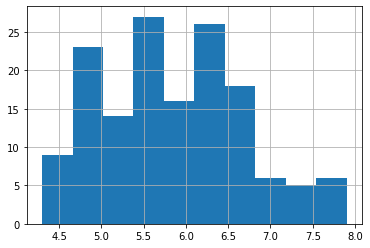

In [8]:
df["Sepal Length"].hist()

<AxesSubplot:>

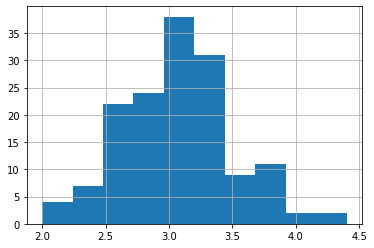

In [9]:
df["Sepal Width"].hist()

<AxesSubplot:>

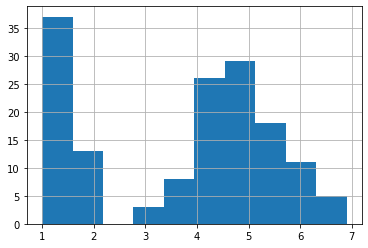

In [10]:
df["Petal Length"].hist()

<AxesSubplot:>

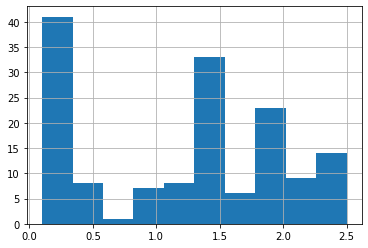

In [11]:
df["Petal width"].hist()

### Scatter Plot

In [12]:
colors = ['red', 'orange', 'blue']
species = ["Iris-virginica", "Iris-versicolor", "Iris-setosa"]

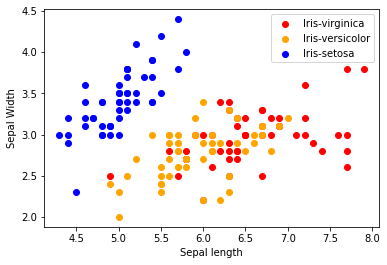

In [13]:
for i in range(3):
    x = df[df["Species"] == species[i]]
    plt.scatter(x["Sepal Length"], x["Sepal Width"], c = colors[i], label=species[i])
    
# label the axis 
plt.xlabel("Sepal length")
plt.ylabel("Sepal Width")
plt.legend()

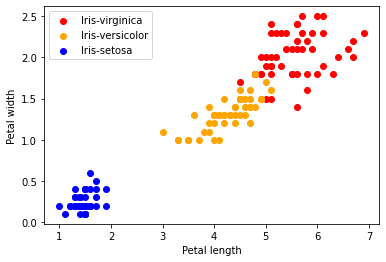

In [14]:
for i in range(3):
    x = df[df["Species"] == species[i]]
    plt.scatter(x["Petal Length"], x["Petal width"], c = colors[i], label=species[i])
    
# label the axis 
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()

# Correlation Matrix

In [15]:
df.corr()

,Sepal Length,Sepal Width,Petal Length,Petal width
Sepal Length,1.000000,-0.109369,0.871754,0.817954
Sepal Width,-0.109369,1.000000,-0.420516,-0.356544
Petal Length,0.871754,-0.420516,1.000000,0.962757
Petal width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

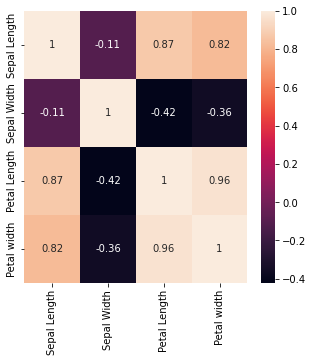

In [16]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, ax=ax)

# Label Encodeing

Converting label into numeric form so as to convert into machine readable form.

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
df["Species"] = le.fit_transform(df["Species"])
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [50]:
X = df.drop(columns = ["Species"])
Y = df["Species"]

# 30 percent of data is used in test.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [51]:
model = LogisticRegression()

In [52]:
# Model Training
model.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
# Print metric to get performance

print("Accuracy for LR: ", model.score(x_test, y_test) * 100)

Accuracy for LR:  91.11111111111111


## For KNN

In [54]:
model= KNeighborsClassifier()

In [55]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [56]:
print(" Accuracy for KNN Model : ", model.score(x_test, y_test) * 100)

 Accuracy for KNN Model :  95.55555555555556


## For Decision Tree Classifier

In [57]:
model = DecisionTreeClassifier()

In [58]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [59]:
print("Accuracy for DT:", model.score(x_test, y_test) * 100)

Accuracy for DT: 91.11111111111111
